In [3]:
import pandas as pd
from pycaret.regression import *
train = pd.read_csv("../../datasets/regression/train.csv")
test = pd.read_csv("../../datasets/regression/test.csv")
dataset = train.append(test, ignore_index = True)

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
s = setup(
    dataset,
    target = "SalePrice",
    train_size = 0.5,
    numeric_imputation = "mean",
    categorical_imputation = "constant"
)

,Description,Value
0,session_id,6397
1,Target,SalePrice
2,Original Data,"(2919, 81)"
3,Missing Values,True
4,Numeric Features,20
5,Categorical Features,60
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(725, 360)"


In [3]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,19024.8388,1044671902.7391,31431.6926,0.8418,0.1456,0.1068,0.0460
gbr,Gradient Boosting Regressor,19089.4616,1109691123.3953,31884.8401,0.8203,0.1451,0.1072,0.1360
rf,Random Forest Regressor,19923.7169,1255547811.9239,34677.9652,0.8086,0.1550,0.1120,0.2850
ada,AdaBoost Regressor,26522.0631,1521853300.8323,38622.9994,0.7643,0.2076,0.1686,0.0900
ridge,Ridge Regression,22043.0839,1594428153.6000,37578.3633,0.7430,0.1885,0.1272,0.0180
et,Extra Trees Regressor,24519.7034,1933551440.5498,42811.5205,0.7001,0.1759,0.1300,0.3310
en,Elastic Net,23237.7021,2072939123.2000,42195.0975,0.6668,0.1749,0.1293,0.0620
omp,Orthogonal Matching Pursuit,20425.7899,2123530913.3752,41121.4716,0.6461,0.1781,0.1141,0.0100
lasso,Lasso Regression,22813.9742,2277814432.0000,43275.7770,0.6208,0.1893,0.1302,0.0600
knn,K Neighbors Regressor,32482.3158,2706404454.4000,50989.6344,0.6110,0.2267,0.1756,0.0210


In [5]:
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2137, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [6]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

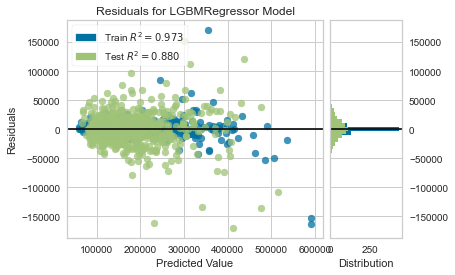

In [7]:
plot_model(best, plot = 'residuals')

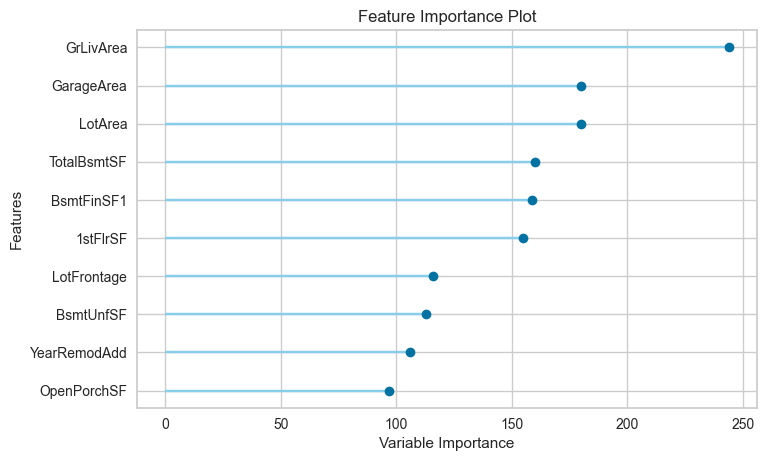

In [8]:
plot_model(best, plot = 'feature')

In [9]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17201.3129,679845990.4722,26073.8565,0.8805,0.1518,0.1090


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,128683.032289
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,160221.155755
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,197687.584172
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,183915.629892
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,175810.604844


In [10]:
predictions = predict_model(best, data = test, )
predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,128683.032289
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,160221.155755
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,197687.584172
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,183915.629892
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,175810.604844
